# Importation des Librairies

In [340]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd # data frame
import numpy as np # manipulate N-dimensional arrays
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualization 
import scipy # scientific computing library
%matplotlib inline

## Importation des librairies et de la base de données "Iris" pour la classification

In [341]:
from sklearn.datasets import load_iris
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Préparation des données
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

class:
* Iris-Setosa
* Iris-Versicolour
* Iris-Virginica

In [652]:
#X contient les données des variables explicatives, Y contient la variable cible (à prédire)
X = load_iris().data
Y = load_iris().target

In [531]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [532]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

Utilisation de 'Standard Scalar Function' pour la standardisation des données, on va l'appliquer seulement sur les données d'apprentissage parce que nous ne voulons pas que notre modèle voie ces données avant, afin d’éviter un surajustement.

In [533]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Création des Dataframes avec Pandas

In [534]:
X_train = pd.DataFrame(data = X_train, columns=load_iris().feature_names)
X_train['class'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_iris().feature_names)
X_test['class'] = list(y_test)

In [535]:
X_train.shape

(75, 5)

In [536]:
y_train.shape

(75,)

#### Implementation de SGD Classifier avec SKlearn

In [17]:
#Paramètres par défaut
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

#### Matrice de confusion

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[24,  0,  0],
       [ 0, 24,  0],
       [ 0,  2, 25]], dtype=int64)

#### Score de précision

In [19]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

97.333 %


#### Test du modèle pour différents paramètres (max_iter, tol, Shuffle)

In [40]:
#max_iter=100,tol=0.1
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=100,tol=0.1)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 6 18  0]
 [ 0  0 27]]
92.0 %


In [67]:
#max_iter=100
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=100)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  4 23]]
94.667 %


In [74]:
#max_iter=100,tol=1e-6
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=100,tol=1e-6)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  3 24]]
96.0 %


In [75]:
#tol=0.1
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(tol=0.1)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  4 23]]
94.667 %


In [76]:
#tol=1e-6
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(tol=1e-6)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  1 26]]
98.667 %


In [77]:
#max_iter=10000, tol=0.1
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=10000,tol=0.1)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  1 26]]
98.667 %


In [89]:
#max_iter=10000
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=10000)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  1 26]]
98.667 %


In [88]:
#max_iter=10000, tol=1e-6
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=10000,tol=1e-6)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  0 27]]
100.0 %


In [91]:
#shuffle = False
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(shuffle = False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  0 27]]
100.0 %


In [92]:
#shuffle = False, max_iter=100,tol=0.1 
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=100,tol=0.1,shuffle = False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  4 23]]
94.667 %


In [93]:
#shuffle = False, max_iter=100
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=100, shuffle=False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  0 27]]
100.0 %


In [94]:
#shuffle = Falsemax_iter=100,tol=1e-6
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=100,tol=1e-6,shuffle = False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  0 27]]
100.0 %


In [96]:
#shuffle = False, tol=0.1
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(tol=0.1,shuffle=False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  4 23]]
94.667 %


In [97]:
#shuffle = False, tol=1e-6
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(tol=1e-6,shuffle=False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  0 27]]
100.0 %


In [98]:
#shuffle=False, max_iter=10000, tol=0.1
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=10000,tol=0.1, shuffle =False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  4 23]]
94.667 %


In [99]:
#shuffle=False, max_iter=10000
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=10000, shuffle =False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  0 27]]
100.0 %


In [100]:
#shuffle=False, max_iter=10000, tol=1e-6
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter=10000,tol=1e-6, shuffle =False)
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[24  0  0]
 [ 0 24  0]
 [ 0  0 27]]
100.0 %


### Importation de la base de données "chronic_kidney_disease" pour une deuxième classification

In [806]:
df = pd.read_csv('./chronic_kidney_disease.csv', header=0)
print(df.shape)
print(df.columns)

(400, 25)
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


### Characteristics of the data

1.Age(numerical)  age in years 

2.Blood Pressure(numerical)  bp in mm/Hg 

3.Specific Gravity(nominal??)  sg - (1.005,1.010,1.015,1.020,1.025) 

4.Albumin(nominal??)  al - (0,1,2,3,4,5) 

5.Sugar(nominal??)  su - (0,1,2,3,4,5) 

6.Red Blood Cells(nominal)  rbc - (normal,abnormal) 

7.Pus Cell (nominal)  pc - (normal,abnormal) 

8.Pus Cell clumps(nominal)  pcc - (present,notpresent) 

9.Bacteria(nominal)  ba - (present,notpresent) 

10.Blood Glucose Random(numerical)	 bgr in mgs/dl 

11.Blood Urea(numerical)   bu in mgs/dl

12.Serum Creatinine(numerical)	 sc in mgs/dl

13.Sodium(numerical)  sod in mEq/L 

14.Potassium(numerical)	 pot in mEq/L 

15.Hemoglobin(numerical)  hemo in gms 

16.Packed Cell Volume(numerical) 

17.White Blood Cell Count(numerical)  wc in cells/cumm 

18.Red Blood Cell Count(numerical)	 rc in millions/cmm 

19.Hypertension(nominal)	 htn - (yes,no) 

20.Diabetes Mellitus(nominal)	 dm - (yes,no) 

21.Coronary Artery Disease(nominal)  cad - (yes,no) 

22.Appetite(nominal)	 appet - (good,poor) 

23.Pedal Edema(nominal)  pe - (yes,no)	

24.Anemia(nominal)  ane - (yes,no) 

25.class(nominal)(target)  (ckd,notckd)

### Check the head of the data

In [807]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Check the info() and describe() methods on the data.

In [808]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     105
rbcc     130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [809]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [810]:
#X contient les données des variables explicatives, Y contient la variable cible (à prédire)
X = df.drop("class", axis =1)
Y = df["class"]

In [811]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [812]:
Y.head()

0    ckd
1    ckd
2    ckd
3    ckd
4    ckd
Name: class, dtype: object

### Check the missing Values

In [813]:
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wbcc     105
rbcc     130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [814]:
Y.isnull().sum()

0

### Replace missing values with a median / most frequent values

#### Handling numerical attributes

In [815]:
# Replace missing values with a median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#Create a copy without text attribute
#Nominal attributes:"rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"
X_num = X[["age", "bp","sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo","pcv", "wbcc", "rbcc"]]

In [816]:
X_num.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [817]:
#fit the imputer instance to the data
imputer.fit(X_num)
#imputer.statistics_
X_num.median().values

array([5.500e+01, 8.000e+01, 1.020e+00, 0.000e+00, 0.000e+00, 1.210e+02,
       4.200e+01, 1.300e+00, 1.380e+02, 4.400e+00, 1.265e+01, 4.000e+01,
       8.000e+03, 4.800e+00])

In [818]:
#trasform the dataset by replacing the missing values by the medians
I = imputer.transform(X_num)
X_num_tr = pd.DataFrame(I, columns = X_num.columns)

In [819]:
X_num_tr.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


#### Handling categorical attributes

In [820]:
X_cat = X[["rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"]]

#Use the pandas functions : factorize(), Imputer with the "most_frequent" strategy to preprocess and
#transform the categorical attributes

X_cat_encoded = []
X_categories = []
for x in X_cat:
    X_cat_encod, X_categ = pd.factorize(X_cat[x])
    X_cat_encoded.append(X_cat_encod)
    X_categories.append(X_categ)
print(X_cat_encoded)
print(X_categories)


[array([-1, -1,  0,  0,  0, -1, -1,  0,  0,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1,  1, -1,  0, -1,  0, -1, -1,  0, -1,  1, -1, -1, -1,  1,
        0,  1,  0, -1,  1,  0,  0, -1, -1,  1,  1, -1, -1, -1,  0,  0, -1,
       -1, -1, -1,  0,  1,  0, -1,  1, -1, -1,  0, -1,  1, -1, -1,  1,  0,
       -1, -1, -1,  0, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  0,  0,
       -1, -1,  0, -1, -1,  0,  1,  0,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1,  1,  1,  1,  1,  0, -1,  1,  0, -1, -1,
        1,  1,  1, -1,  0,  0,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  0, -1,  1, -1, -1,  0,  0,  1, -1,  1,  0, -1, -1, -1, -1,  0,
        0, -1,  1,  1,  0, -1,  1, -1,  1,  1, -1,  0, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  

In [821]:
#replace missing categorical values by the most frequent ones
X_cat_encoded = pd.DataFrame(np.transpose(X_cat_encoded))
X_cat_encoded.info()
imputer = SimpleImputer(missing_values= -1, strategy="most_frequent")
#fit the imputer instance to the data
imputer.fit(X_cat_encoded)
imputer.statistics_
# trasform the dataset by replacing the missing values by the most frequent values
X_cat_enc = imputer.transform(X_cat_encoded)
X_cat_tr = pd.DataFrame(X_cat_enc, columns = X_cat.columns)
X_cat_tr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       400 non-null    int64
 1   1       400 non-null    int64
 2   2       400 non-null    int64
 3   3       400 non-null    int64
 4   4       400 non-null    int64
 5   5       400 non-null    int64
 6   6       400 non-null    int64
 7   7       400 non-null    int64
 8   8       400 non-null    int64
 9   9       400 non-null    int64
dtypes: int64(10)
memory usage: 31.4 KB


,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.117500,0.190000,0.105000,0.055000,0.632500,0.697500,0.095000,0.205000,0.190000,0.150000
std,0.322418,0.392792,0.306937,0.228266,0.482728,0.567273,0.310186,0.404207,0.392792,0.357519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000


In [822]:
# Merge the numerical and categorical datasets
X_tr = pd.concat([X_num_tr, X_cat_tr], axis=1)
X_tr.describe()
X_tr.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,0,0,0,0,0,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,0,0,0,0,1,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,0,0,0,0,1,0,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,1,0,0,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,0,0,0,0,1,1,0,0,0,0


### Data Visualization

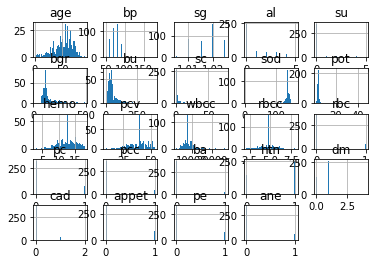

In [823]:
#Plot a histogram for each attribute
X_tr.hist(bins=50)
plt.show()
#"age", "bp","sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo","pcv", "wbcc", "rbcc"
# "rbc","pc","pcc","ba","htn","dm", "cad", "appet", "pe", "ane"

In [824]:
Y[Y=="ckd"]=1
Y[Y=="notckd"]=0
Y=Y.astype('int')

In [825]:
#Y = Y.to_numpy()
X = X_tr.to_numpy()

In [826]:
type(Y)

pandas.core.series.Series

In [827]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

### Data Standardisation
Scale the data so that each feature has a single unit variance and zero mean

In [828]:
# Import the library
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [829]:
X_train = pd.DataFrame(data = X_train, columns=X_tr.columns)
X_train['class'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=X_tr.columns)
X_test['class'] = list(y_test)

In [876]:
print(X_train.shape)
X_train.head()

(200, 25)


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,-1.578459,0.263262,0.402267,-0.726004,-0.365338,-0.689149,-0.254798,-0.315857,0.684499,-0.369179,...,-0.507801,-0.333333,-0.229416,0.741881,0.596699,-0.261488,-0.531085,-0.492175,-0.42829,0
1,0.309438,7.785036,0.402267,-0.726004,3.334285,2.306514,-0.745072,-0.286567,0.132669,-0.238727,...,1.969276,-0.333333,-0.229416,-1.347925,-1.267986,-0.261488,1.882938,2.031798,-0.42829,1
2,-0.752504,0.263262,0.402267,-0.726004,-0.365338,-0.601471,-0.856498,-0.389082,0.868442,-0.369179,...,-0.507801,-0.333333,-0.229416,0.741881,0.596699,-0.261488,-0.531085,-0.492175,-0.42829,0
3,-1.047488,-1.241093,1.316510,-0.726004,-0.365338,-0.879118,-0.722787,-0.330502,0.776470,-0.369179,...,-0.507801,-0.333333,-0.229416,0.741881,0.596699,-0.261488,-0.531085,-0.492175,-0.42829,0
4,0.368435,-1.241093,0.402267,-0.726004,-0.365338,-0.513793,-0.187942,-0.286567,1.144357,0.022177,...,-0.507801,-0.333333,-0.229416,0.741881,0.596699,-0.261488,-0.531085,-0.492175,-0.42829,0


In [875]:
print(X_test.shape)
X_test.head()

(200, 25)


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,-1.991437,-1.241093,1.316510,-0.726004,-0.365338,-0.382276,-0.165657,-0.315857,-0.235217,0.087403,...,-0.507801,-0.333333,-0.229416,0.741881,0.596699,-0.261488,-0.531085,-0.492175,-0.42829,0
1,1.253387,1.015440,0.402267,-0.726004,-0.365338,2.452644,-0.477650,-0.096181,-0.603104,-0.108275,...,-0.507801,-0.333333,-0.229416,-1.347925,-1.267986,-0.261488,1.882938,-0.492175,-0.42829,1
2,-1.342472,-0.488915,0.402267,-0.726004,-0.365338,-0.133855,-0.633646,-0.374437,0.684499,0.087403,...,-0.507801,-0.333333,-0.229416,0.741881,0.596699,-0.261488,-0.531085,-0.492175,-0.42829,0
3,-1.519462,-0.488915,0.402267,-0.726004,-0.365338,-0.762214,-0.343938,-0.389082,-0.143246,-0.369179,...,-0.507801,-0.333333,-0.229416,0.741881,0.596699,-0.261488,-0.531085,-0.492175,-0.42829,0
4,0.663419,0.263262,-1.426220,0.046341,1.484473,2.467257,1.238310,-0.037601,-0.695075,-0.695309,...,-0.507801,-0.333333,-0.229416,0.741881,0.596699,-0.261488,-0.531085,-0.492175,-0.42829,1


#### Implémenatation de SGD Classifier sur la base 'Chronic_Kidney_disease'

In [834]:
#Paramètres par défaut
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier()
mdl.fit(X_train,y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[ 75   0]
 [  1 124]]
99.5 %


In [839]:
#max_iter=100, tol = 0.1
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter = 100, tol = 0.1)
mdl.fit(X_train,y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[ 75   0]
 [  2 123]]
99.0 %


In [874]:
#max_iter=10000, tol = 1e-6
from sklearn.linear_model import SGDClassifier
mdl = SGDClassifier(max_iter = 10000, tol = 1e-6)
mdl.fit(X_train,y_train)
y_pred = mdl.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,y_pred)*100,3),'%')

[[ 75   0]
 [  0 125]]
100.0 %


### Implementing SGD Classifier on 'Iris dataset' in semi-supervised learning

#### Implementing an unlabelising function 'maskData'

In [1033]:
import random

def maskData(true_labels, percentage):

    mask = np.ones((1,len(true_labels)),dtype=bool)[0]
    labels = true_labels.copy()
    
    for l, enc in zip(np.unique(true_labels),range(0,len(np.unique(true_labels)))):
        
        deck = np.argwhere(true_labels == l).flatten()        
        random.shuffle(deck)
        
        mask[deck[:int(percentage * len(true_labels[true_labels == l]))]] = False

        labels[labels == l] = enc

    labels[mask] = -1
    
    return np.array(labels).astype(int)
    

#### Importation de la base et prétraitement de données

In [1048]:
 #IMPORT DATASETS
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
labels = iris.target
    
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=1)
#Data standardisation
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(data = X_train, columns=load_iris().feature_names)
X_train['class'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_iris().feature_names)
X_test['class'] = list(y_test)

#### Lab = 10%, nonLab = 80%, Test= 10%

In [1074]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

def runLP():

    #UNLABEL 90% OF THE DATASET
    masked_labels = maskData(y_train, 0.1)
    
    #RUN THE MODEL
    model = SGDClassifier(max_iter = 10000, tol =1e-6)
    model.fit(X_train, masked_labels)
    y_pred = model.predict(X_test)
    
    #PRINT CONFUSION MATRIX
    print(confusion_matrix(y_test, y_pred))
    print(round(accuracy_score(y_test,y_pred)*100,3),'%')

    
if __name__ == '__main__':
    runLP()

[[0 0 0 0]
 [5 0 0 0]
 [6 0 0 0]
 [3 0 0 1]]
6.667 %


#### Lab = 20%, nonLab = 70%, Test= 10%

In [1067]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

def runLP():

    #UNLABEL 90% OF THE DATASET
    masked_labels = maskData(y_train, 0.2)
    
    #RUN THE MODEL
    model = SGDClassifier(max_iter = 10000, tol =1e-6)
    model.fit(X_train, masked_labels)
    y_pred = model.predict(X_test)
    
    #PRINT CONFUSION MATRIX
    print(confusion_matrix(y_test, y_pred))
    print(round(accuracy_score(y_test,y_pred)*100,3),'%')

    
if __name__ == '__main__':
    runLP()

[[0 0 0 0]
 [5 0 0 0]
 [6 0 0 0]
 [0 0 0 4]]
26.667 %


#### Lab = 30%, nonLab = 70%, Test= 10%

In [1094]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

def runLP():

    #UNLABEL 90% OF THE DATASET
    masked_labels = maskData(y_train, 0.3)
    
    #RUN THE MODEL
    model = SGDClassifier(max_iter = 10000, tol =1e-6)
    model.fit(X_train, masked_labels)
    y_pred = model.predict(X_test)
    
    #PRINT CONFUSION MATRIX
    print(confusion_matrix(y_test, y_pred))
    print(round(accuracy_score(y_test,y_pred)*100,3),'%')

    
if __name__ == '__main__':
    runLP()

[[0 0 0 0]
 [4 1 0 0]
 [5 0 1 0]
 [0 0 0 4]]
40.0 %


#### Lab = 40%, nonLab = 50%, Test= 10%

In [1101]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

def runLP():

    #UNLABEL 90% OF THE DATASET
    masked_labels = maskData(y_train, 0.4)
    
    #RUN THE MODEL
    model = SGDClassifier(max_iter = 10000, tol =1e-6)
    model.fit(X_train, masked_labels)
    y_pred = model.predict(X_test)
    
    #PRINT CONFUSION MATRIX
    print(confusion_matrix(y_test, y_pred))
    print(round(accuracy_score(y_test,y_pred)*100,3),'%')

    
if __name__ == '__main__':
    runLP()

[[0 0 0 0]
 [5 0 0 0]
 [3 0 3 0]
 [0 0 0 4]]
46.667 %


#### Lab = 50%, nonLab = 40%, Test= 10%

In [1107]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

def runLP():

    #UNLABEL 90% OF THE DATASET
    masked_labels = maskData(y_train, 0.5)
    
    #RUN THE MODEL
    model = SGDClassifier(max_iter = 10000, tol =1e-6)
    model.fit(X_train, masked_labels)
    y_pred = model.predict(X_test)
    
    #PRINT CONFUSION MATRIX
    print(confusion_matrix(y_test, y_pred))
    print(round(accuracy_score(y_test,y_pred)*100,3),'%')

    
if __name__ == '__main__':
    runLP()

[[0 0 0 0]
 [2 3 0 0]
 [1 0 5 0]
 [4 0 0 0]]
53.333 %


#### Lab = 60%, nonLab = 30%, Test= 10%

In [1108]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

def runLP():

    #UNLABEL 90% OF THE DATASET
    masked_labels = maskData(y_train, 0.6)
    
    #RUN THE MODEL
    model = SGDClassifier(max_iter = 10000, tol =1e-6)
    model.fit(X_train, masked_labels)
    y_pred = model.predict(X_test)
    
    #PRINT CONFUSION MATRIX
    print(confusion_matrix(y_test, y_pred))
    print(round(accuracy_score(y_test,y_pred)*100,3),'%')

    
if __name__ == '__main__':
    runLP()

[[0 0 0 0]
 [0 5 0 0]
 [1 0 5 0]
 [2 0 2 0]]
66.667 %


#### Lab = 70%, nonLab = 20%, Test= 10%

In [1109]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

def runLP():

    #UNLABEL 90% OF THE DATASET
    masked_labels = maskData(y_train, 0.7)
    
    #RUN THE MODEL
    model = SGDClassifier(max_iter = 10000, tol =1e-6)
    model.fit(X_train, masked_labels)
    y_pred = model.predict(X_test)
    
    #PRINT CONFUSION MATRIX
    print(confusion_matrix(y_test, y_pred))
    print(round(accuracy_score(y_test,y_pred)*100,3),'%')

    
if __name__ == '__main__':
    runLP()

[[0 0 0 0]
 [1 4 0 0]
 [1 0 5 0]
 [0 0 0 4]]
86.667 %


#### Lab = 80%, nonLab = 10%, Test= 10%

In [1111]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation

def runLP():

    #UNLABEL 90% OF THE DATASET
    masked_labels = maskData(y_train, 0.8)
    
    #RUN THE MODEL
    model = SGDClassifier(max_iter = 10000, tol =1e-6)
    model.fit(X_train, masked_labels)
    y_pred = model.predict(X_test)
    
    #PRINT CONFUSION MATRIX
    print(confusion_matrix(y_test, y_pred))
    print(round(accuracy_score(y_test,y_pred)*100,3),'%')

    
if __name__ == '__main__':
    runLP()

[[5 0 0]
 [0 6 0]
 [0 0 4]]
100.0 %


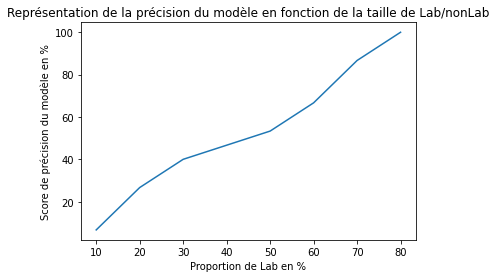

In [1125]:
x = np.array([10, 20, 30,40,50,60,70,80])
y = np.array([6.667,26.667,40,46.667,53.333,66.667,86.667,100])

plt.plot(x, y)
plt.xlabel("Proportion de Lab en %")
plt.ylabel('Score de précision du modèle en %')
plt.title("Représentation de la précision du modèle en fonction de la taille de Lab/nonLab")
plt.show()